In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
import seaborn as sns
plt.style.use('seaborn')

In [130]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\winequality-red.csv")

In [131]:
dfo = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates']]

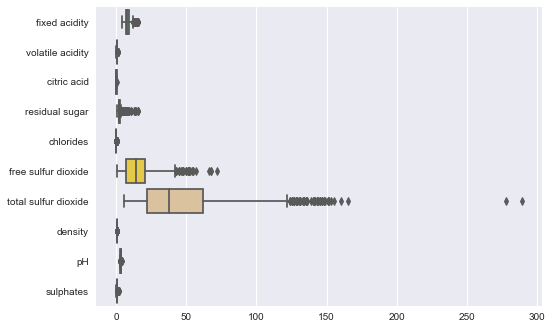

In [132]:
ax = sns.boxplot(data=dfo, orient="h", palette="Set2")

In [133]:
#normalizing
dfN = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
# this is the z score as well
data= (dfN - dfN.mean()) / dfN.std()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


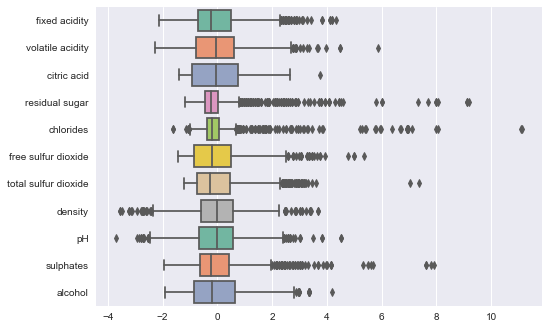

In [134]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

In [135]:
df_ = data[(data <3).all(axis=1)]

In [137]:
df_.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


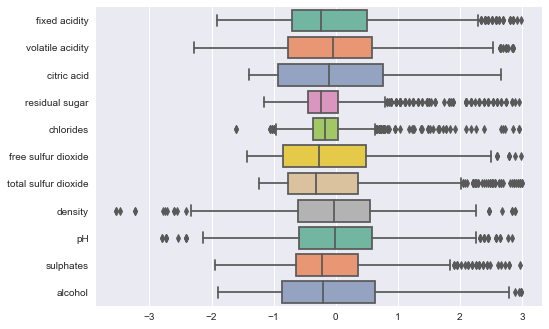

In [138]:
ax = sns.boxplot(data=df_, orient="h", palette="Set2")

In [139]:
data2 = df_

In [140]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [141]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [142]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0]))



In [143]:
alpha = 0.35
#alpha = 0.009
iters = 1000

In [144]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.14275275716067806

In [55]:
alphaList = []
costList = []
def findalpha(alpha):
    a = alpha
    for i in range(0,100):
        g2, cost2 = gradientDescent(X2, y2, theta2, a, iters)
        #computeCost(X2, y2, g2)
        alphaList.append(a)
        costList.append(computeCost(X2, y2, g2))
        a += 0.01

In [56]:
findalpha(0.01)

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


In [61]:
alphadf = pd.DataFrame({'Alpha':alphaList,'Cost':costList})

In [62]:
alphadf.head()

,Alpha,Cost
0,0.01,0.154430
1,0.02,0.144607
2,0.03,0.143062
3,0.04,0.142804
4,0.05,0.142761


In [69]:
alphadf.sort_values('Cost').tail()

,Alpha,Cost
95,0.96,inf
96,0.97,inf
97,0.98,inf
98,0.99,inf
99,1.00,inf


Text(0.5, 1.0, 'Error vs. Training Epoch')

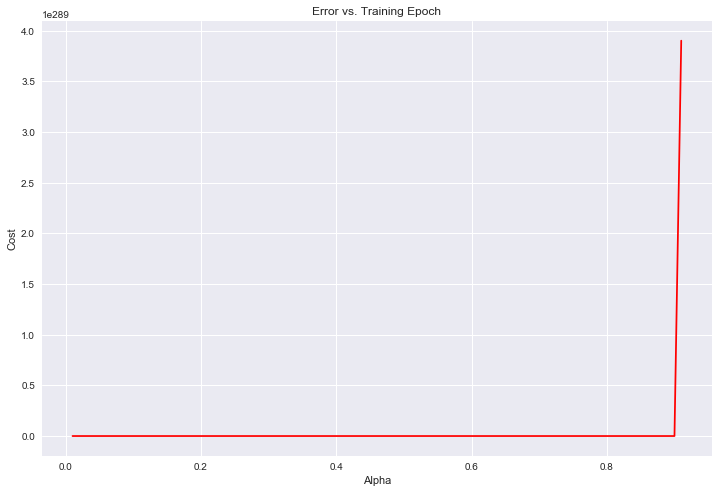

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(alphaList, costList, 'r')
ax.set_xlabel('Alpha')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [120]:
X2*g2.T

matrix([[-0.88162045],
        [-0.67667074],
        [-0.74945977],
        ...,
        [-0.03039584],
        [ 0.27482298],
        [ 0.45937911]])

In [122]:
residuals = X2*g2.T-y2

In [125]:
len(residuals)

1463

In [126]:
predicted = X2*g2.T

In [127]:
len(predicted)

1463

ValueError: Masked arrays must be 1-D

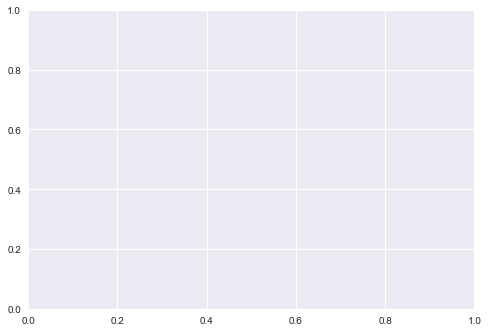

In [123]:
plt.scatter(residuals,X2*g2.T)

plt.show()

In [67]:
MSE = np.square(np.subtract(y2,X2*g2.T)).mean()
print(MSE)

0.2855055143213561


In [68]:
#https://www.askpython.com/python/coefficient-of-determination
from sklearn.metrics import r2_score 
R_square = r2_score(y2, X2*g2.T) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.6928806991515492


Text(0.5, 1.0, 'Error vs. Training Epoch')

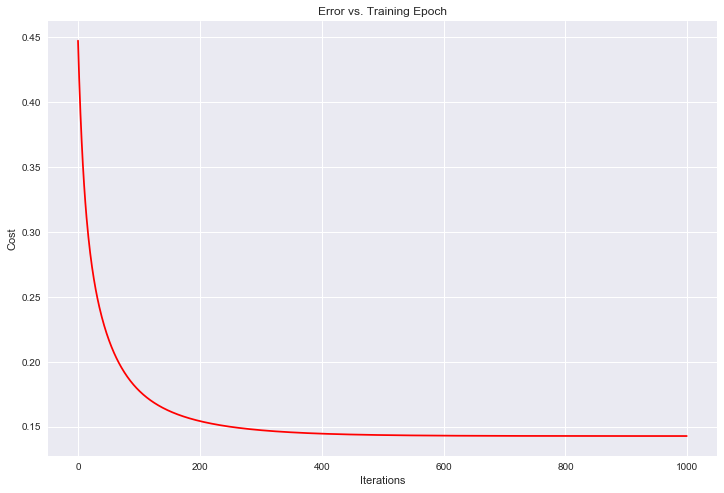

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.range(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

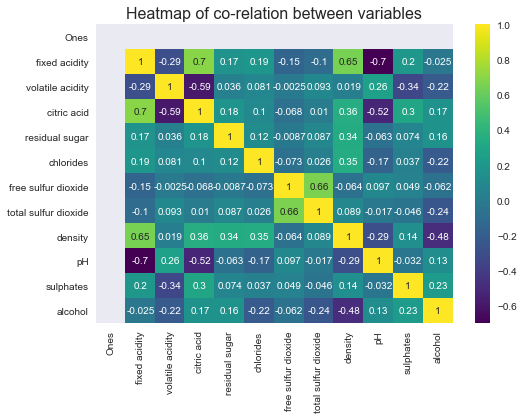

In [80]:
sns.heatmap(df_.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

#### Feature selection and running a regression

In [81]:
df_.columns

Index(['Ones', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [97]:
dffeatures = df_[['volatile acidity','citric acid','residual sugar','chlorides',
                  'total sulfur dioxide','density','sulphates','pH','alcohol']]

In [98]:
data2 = dffeatures

In [101]:
# add ones column
#data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0]))


In [102]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.20083519156388463